In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [9]:
prices = pd.read_csv("Prices.csv")
projects = pd.read_csv("Projects.csv")


In [10]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Proj ID           4718 non-null   int64 
 1   Project_Name      4718 non-null   object
 2   Transacted_Price  4718 non-null   object
 3   Area              4718 non-null   object
 4   Sale_Date         4718 non-null   object
 5   D_TypeOfSale      4718 non-null   int64 
 6   D_PropertyType    4718 non-null   int64 
 7   D_Tenure          4718 non-null   int64 
 8   Postal_District   4718 non-null   int64 
 9   D_FloorLevel      4718 non-null   int64 
 10  Unit_Price        4718 non-null   object
dtypes: int64(6), object(5)
memory usage: 405.6+ KB


In [11]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Proj_ID           23 non-null     int64 
 1   Project_Name      23 non-null     object
 2   Site Area (sqft)  23 non-null     object
 3   No_of_units       23 non-null     int64 
 4   Density           23 non-null     object
 5   TOP_Date          23 non-null     int64 
 6   Unit_Age          23 non-null     int64 
 7   Dist_to_mrt (m)   23 non-null     int64 
 8   MRT               23 non-null     object
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


In [12]:
data_all = prices.merge(projects,how="outer",left_on="Proj ID",right_on="Proj_ID")


In [13]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 0 to 4717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Proj ID           4718 non-null   int64 
 1   Project_Name_x    4718 non-null   object
 2   Transacted_Price  4718 non-null   object
 3   Area              4718 non-null   object
 4   Sale_Date         4718 non-null   object
 5   D_TypeOfSale      4718 non-null   int64 
 6   D_PropertyType    4718 non-null   int64 
 7   D_Tenure          4718 non-null   int64 
 8   Postal_District   4718 non-null   int64 
 9   D_FloorLevel      4718 non-null   int64 
 10  Unit_Price        4718 non-null   object
 11  Proj_ID           4718 non-null   int64 
 12  Project_Name_y    4718 non-null   object
 13  Site Area (sqft)  4718 non-null   object
 14  No_of_units       4718 non-null   int64 
 15  Density           4718 non-null   object
 16  TOP_Date          4718 non-null   int64 
 17  Unit_Age      

In [21]:

data_all["Transacted_Price"]=data_all["Transacted_Price"].str.replace(",","")
data_all["Area"]=data_all["Area"].str.replace(",","")
data_all["Unit_Price"]=data_all["Unit_Price"].str.replace(",","")

data_all=data_all.astype({"Transacted_Price":"float","Area":"float","Unit_Price":"float"})

data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 0 to 4717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Proj ID           4718 non-null   int64  
 1   Project_Name_x    4718 non-null   object 
 2   Transacted_Price  4718 non-null   float64
 3   Area              4718 non-null   float64
 4   Sale_Date         4718 non-null   object 
 5   D_TypeOfSale      4718 non-null   int64  
 6   D_PropertyType    4718 non-null   int64  
 7   D_Tenure          4718 non-null   int64  
 8   Postal_District   4718 non-null   int64  
 9   D_FloorLevel      4718 non-null   int64  
 10  Unit_Price        4718 non-null   float64
 11  Proj_ID           4718 non-null   int64  
 12  Project_Name_y    4718 non-null   object 
 13  Site Area (sqft)  4718 non-null   object 
 14  No_of_units       4718 non-null   int64  
 15  Density           4718 non-null   object 
 16  TOP_Date          4718 non-null   int64  


In [31]:
# Leave selected features for analysis 

data_2=data_all.copy()
data_2=data_2.drop(["Proj ID","Transacted_Price","Sale_Date","D_TypeOfSale","Postal_District","Proj_ID","Project_Name_y","Site Area (sqft)","No_of_units","TOP_Date","MRT"],axis=1)

data_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 0 to 4717
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Project_Name_x   4718 non-null   object 
 1   Area             4718 non-null   float64
 2   D_PropertyType   4718 non-null   int64  
 3   D_Tenure         4718 non-null   int64  
 4   D_FloorLevel     4718 non-null   int64  
 5   Unit_Price       4718 non-null   float64
 6   Density          4718 non-null   object 
 7   Unit_Age         4718 non-null   int64  
 8   Dist_to_mrt (m)  4718 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 368.6+ KB


In [43]:
data_2["Density"]=data_2["Density"].str.replace(",","")
data_2["Density"]=data_2["Density"].str.replace(".","")
data_2["Density"]=data_2["Density"].astype(float)

data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 0 to 4717
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Project_Name_x   4718 non-null   object 
 1   Area             4718 non-null   float64
 2   D_PropertyType   4718 non-null   int64  
 3   D_Tenure         4718 non-null   int64  
 4   D_FloorLevel     4718 non-null   int64  
 5   Unit_Price       4718 non-null   float64
 6   Density          4718 non-null   float64
 7   Unit_Age         4718 non-null   int64  
 8   Dist_to_mrt (m)  4718 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 368.6+ KB


C:\Users\黄叔庆\AppData\Local\Temp\ipykernel_23980\4039492873.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_2["Density"]=data_2["Density"].str.replace(".","")


In [44]:
corr_mat=data_2.corr()
corr_mat

C:\Users\黄叔庆\AppData\Local\Temp\ipykernel_23980\287558508.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=data_2.corr()


,Area,D_PropertyType,D_Tenure,D_FloorLevel,Unit_Price,Density,Unit_Age,Dist_to_mrt (m)
Area,1.000000,0.046831,0.087098,0.073985,0.223269,0.249872,0.176597,0.067406
D_PropertyType,0.046831,1.000000,0.383037,-0.059430,-0.016657,0.101108,0.343783,0.480078
D_Tenure,0.087098,0.383037,1.000000,-0.159645,0.512606,0.128200,-0.179996,0.397567
D_FloorLevel,0.073985,-0.059430,-0.159645,1.000000,0.224744,-0.074816,0.180170,-0.040665
Unit_Price,0.223269,-0.016657,0.512606,0.224744,1.000000,0.352235,-0.388240,0.126194
Density,0.249872,0.101108,0.128200,-0.074816,0.352235,1.000000,0.155328,0.209225
Unit_Age,0.176597,0.343783,-0.179996,0.180170,-0.388240,0.155328,1.000000,0.130647
Dist_to_mrt (m),0.067406,0.480078,0.397567,-0.040665,0.126194,0.209225,0.130647,1.000000


In [45]:
corr_mat["Unit_Price"].sort_values(ascending=False)

Unit_Price         1.000000
D_Tenure           0.512606
Density            0.352235
D_FloorLevel       0.224744
Area               0.223269
Dist_to_mrt (m)    0.126194
D_PropertyType    -0.016657
Unit_Age          -0.388240
Name: Unit_Price, dtype: float64

<Axes: >

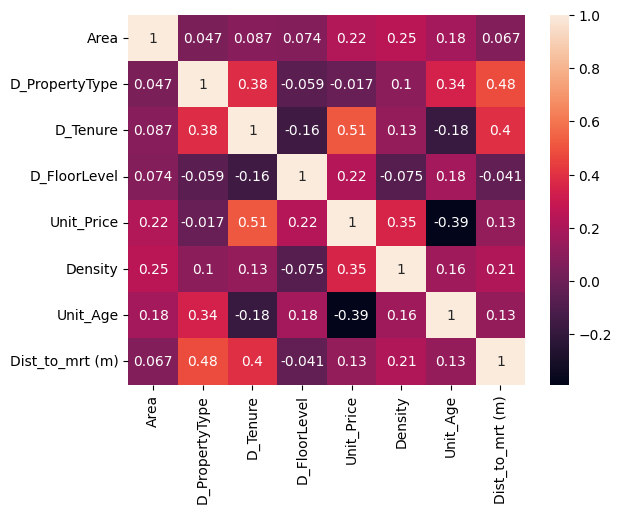

In [46]:
sns.heatmap(corr_mat,annot=True)

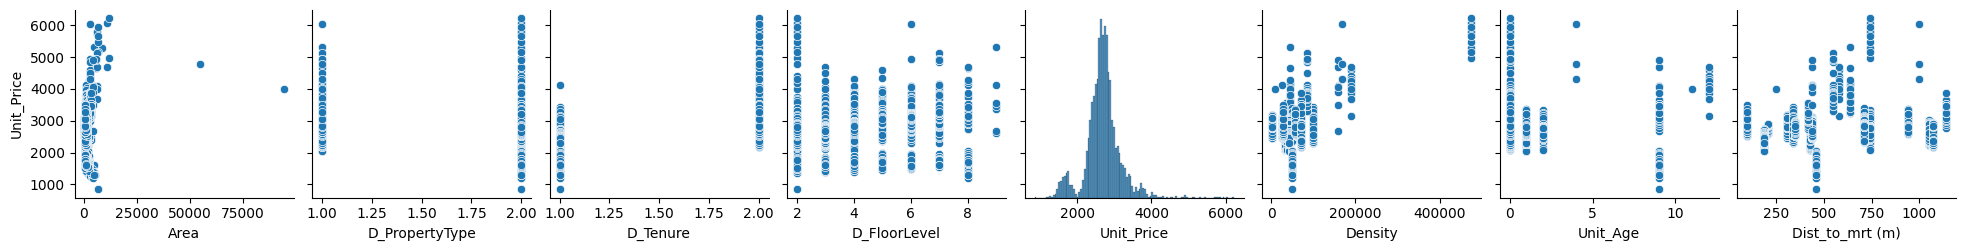

In [47]:
sns.pairplot(data_2,y_vars="Unit_Price")


In [71]:
data_2["Area"].sort_values(ascending=False).head()

4462    94120.42
4460    54638.06
3735    12077.21
3731    12066.44
3728    11226.85
Name: Area, dtype: float64

In [74]:
# Remove outliers

data_2=data_2.drop([4462,4460])
data_2["Area"].sort_values(ascending=False).head()

In [76]:
# Simple Linear Regression Model using Area as feature

X = data_2[["Area"]]
y = data_2.Unit_Price

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y,random_state=42)

linreg = LinearRegression()
linreg.fit(X_train_s, y_train_s)

print(f"The y-intercept of Regression Model is: {linreg.intercept_}.")
print(f"The coefficient of Regression Model is: {linreg.coef_}.")

The y-intercept of Regression Model is: 2449.2244339623285.
The coefficient of Regression Model is: [0.23672303].


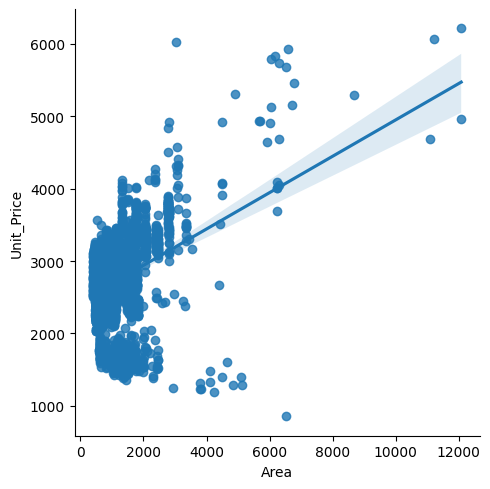

In [77]:
sns.lmplot(x='Area', y='Unit_Price', data=data_2)

In [78]:
y_pred_s = linreg.predict(X_test_s)

y_test_mean = y_test_s.mean()
rmse_s_p = round(((np.sqrt(metrics.mean_squared_error(y_test_s, y_pred_s)))/y_test_mean*100),2)

print(f'RMSE is {rmse_s_p}% from mean of y.')
print('R-square:', linreg.score(X_train_s, y_train_s))

RMSE is 15.7% from mean of y.
R-square: 0.1305642593351357


In [79]:
# Benchmark Model - Taking mean of as predicted y

y_benchmark_mean = y_train_s.mean()
print(f'The meain of y is {y_benchmark_mean}.')

y_null = np.zeros_like(y_test_s, dtype=float)
y_null.fill(y_benchmark_mean)
#print(y_null)

rmse_bm = round(((np.sqrt(metrics.mean_squared_error(y_test_s, y_null)))/y_test_mean*100),2)

print(f'RMSE of benchmark model is {rmse_bm}% from mean of y.')


The meain of y is 2691.0441051738762.
RMSE of benchmark model is 17.59% from mean of y.


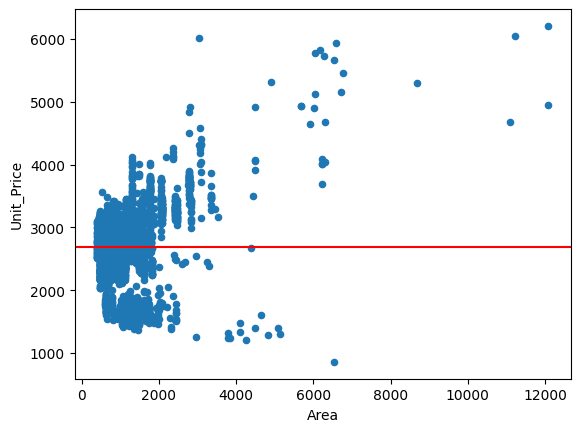

In [82]:
data_2.plot(kind='scatter', x='Area', y='Unit_Price')

plt.axhline(y=2691.04,color="r")
plt.show()

In [89]:
# Multi Factors Linear Regression

feature_cols = ['Area', 'D_PropertyType', 'D_Tenure', 'Unit_Age', 'Dist_to_mrt (m)']

X = data_2[feature_cols]
y = data_2.Unit_Price

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y,random_state=42)

linreg_multi = LinearRegression()
linreg_multi.fit(X_train_m, y_train_m)

print(f"The y-intercept of multi-factors regression model is {linreg_multi.intercept_}.")
print()
print("Coefficient of the features as below:")
list(zip(feature_cols, linreg_multi.coef_))

The y-intercept of multi-factors regression model is 2061.9899993887702.

Coefficient of the features as below:


[('Area', 0.29640037228630367),
 ('D_PropertyType', -89.35327439352449),
 ('D_Tenure', 384.791676738646),
 ('Unit_Age', -74.86240291068248),
 ('Dist_to_mrt (m)', -0.039590381855745704)]

In [90]:
y_pred_m = linreg_multi.predict(X_test_m)

y_test_mean = y_test_m.mean()
rmse_m_p = round(((np.sqrt(metrics.mean_squared_error(y_test_m, y_pred_m)))/y_test_mean*100),2)

print(f'RMSE is {rmse_m_p}% from mean of y.')
print('R-square:', linreg_multi.score(X_train_m, y_train_m))


RMSE is 11.53% from mean of y.
R-square: 0.5474602716198407


In [102]:
data_time=pd.read_csv("Prices.csv")
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Proj ID           4718 non-null   int64 
 1   Project_Name      4718 non-null   object
 2   Transacted_Price  4718 non-null   object
 3   Area              4718 non-null   object
 4   Sale_Date         4718 non-null   object
 5   D_TypeOfSale      4718 non-null   int64 
 6   D_PropertyType    4718 non-null   int64 
 7   D_Tenure          4718 non-null   int64 
 8   Postal_District   4718 non-null   int64 
 9   D_FloorLevel      4718 non-null   int64 
 10  Unit_Price        4718 non-null   object
dtypes: int64(6), object(5)
memory usage: 405.6+ KB


In [104]:
data_time["Sale_Date"]=pd.to_datetime(data_time["Sale_Date"])

In [105]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Proj ID           4718 non-null   int64         
 1   Project_Name      4718 non-null   object        
 2   Transacted_Price  4718 non-null   object        
 3   Area              4718 non-null   object        
 4   Sale_Date         4718 non-null   datetime64[ns]
 5   D_TypeOfSale      4718 non-null   int64         
 6   D_PropertyType    4718 non-null   int64         
 7   D_Tenure          4718 non-null   int64         
 8   Postal_District   4718 non-null   int64         
 9   D_FloorLevel      4718 non-null   int64         
 10  Unit_Price        4718 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 405.6+ KB


In [107]:
# Time Series ARIMA Model


data3 = data_time[["Sale_Date","Unit_Price"]].copy()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sale_Date   4718 non-null   datetime64[ns]
 1   Unit_Price  4718 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 73.8+ KB


In [110]:
data3["Unit_Price"]=data3["Unit_Price"].str.replace(",","")
data3["Unit_Price"]=data3["Unit_Price"].str.replace(".","")
data3["Unit_Price"]=data3["Unit_Price"].astype(float)

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sale_Date   4718 non-null   datetime64[ns]
 1   Unit_Price  4718 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 73.8 KB


C:\Users\黄叔庆\AppData\Local\Temp\ipykernel_23980\2176747375.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data3["Unit_Price"]=data3["Unit_Price"].str.replace(".","")


In [112]:
data4=pd.DataFrame(data3.groupby(["Sale_Date"])["Unit_Price"].mean())
data4

,Unit_Price
Sale_Date,
2018-03-01,2547.833333
2018-04-01,1804.571429
2018-05-01,1807.000000
2018-06-01,2137.812500
2018-07-01,2470.944444
2018-08-01,1782.500000
2018-09-01,2503.388889
2018-10-01,2402.818182
2018-11-01,2291.066667


<Axes: xlabel='Sale_Date'>

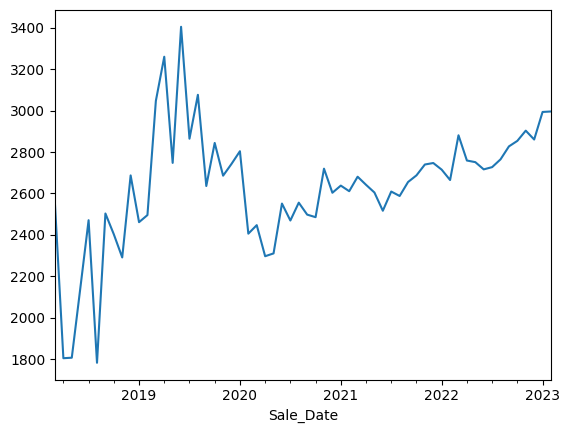

In [117]:
data4["Unit_Price"].plot()

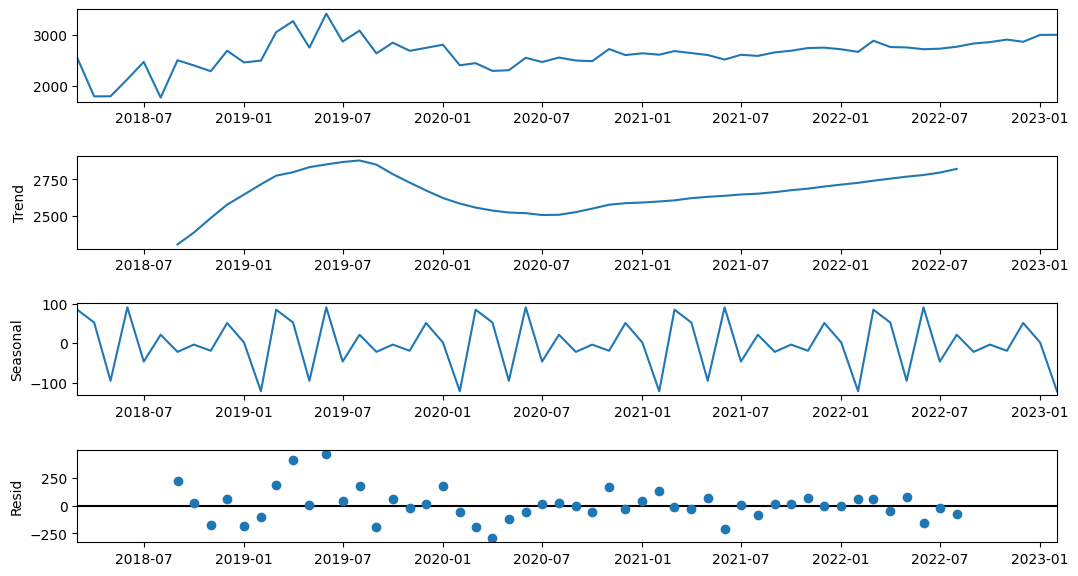

In [118]:
decomposition = seasonal_decompose(data4, period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 6)

plt.show()

In [125]:
train_t = data4["2018":"2021"]
test_t = data4["2022":"2023"]


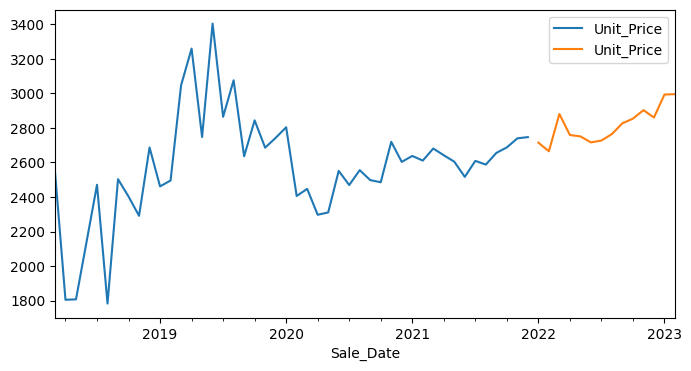

In [126]:
fig, ax = plt.subplots(figsize=(8, 4))

train_t.plot(ax=ax, label="train")
test_t.plot(ax=ax, label="test")
ax.legend()

plt.show()

C:\Users\黄叔庆\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\黄叔庆\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\黄叔庆\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


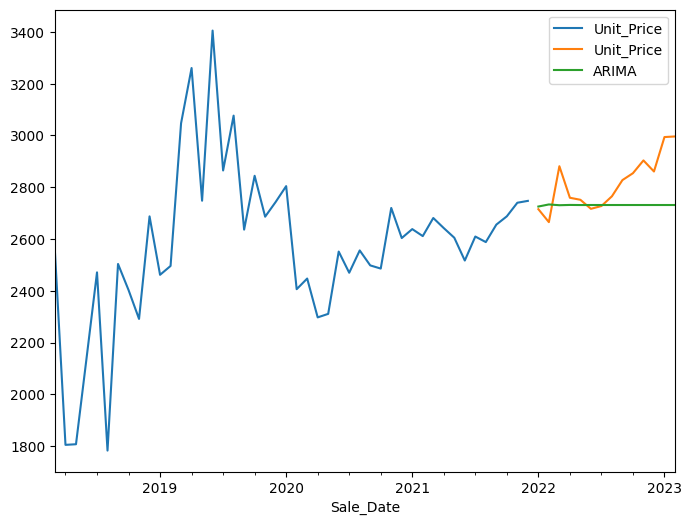

In [127]:
model_t = ARIMA(train_t, order=(1, 1, 1)).fit()

y_pred_t = model_t.predict(start="2022-01-01", end="2023-02-01")

fig, ax = plt.subplots(figsize=(8, 6))

train_t.plot(ax=ax, label="train")
test_t.plot(ax=ax, label="test")
y_pred_t.plot(ax=ax, label="ARIMA")
ax.legend()

plt.show()


In [140]:
data3["Unit_Price"].mean()

2693.593471810089

In [138]:
data3.mean()
#y_test_mean = data4[].mean()
#rmse_t_p = round(((np.sqrt(metrics.mean_squared_error(test_t, y_pred_t)))/y_test_mean*100),2)
#rmse_t_p

C:\Users\黄叔庆\AppData\Local\Temp\ipykernel_23980\1942599032.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data3.mean()


Unit_Price    2693.593472
dtype: float64

In [141]:
y_mean = data3["Unit_Price"].mean()
rmse_t_p = round(((np.sqrt(metrics.mean_squared_error(test_t, y_pred_t)))/y_mean*100),2)

print(f'RMSE is {rmse_t_p}% from mean of y.')



RMSE is 4.86% from mean of y.


In [2]:
# Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor


In [5]:
# import data

prices2 = pd.read_csv("Prices.csv")

prices2["Area"]=prices2["Area"].str.replace(",","")
prices2["Unit_Price"]=prices2["Unit_Price"].str.replace(",","")

prices2=prices2.astype({"Area":"float","Unit_Price":"float"})

prices2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Proj ID           4718 non-null   int64  
 1   Project_Name      4718 non-null   object 
 2   Transacted_Price  4718 non-null   object 
 3   Area              4718 non-null   float64
 4   Sale_Date         4718 non-null   object 
 5   D_TypeOfSale      4718 non-null   int64  
 6   D_PropertyType    4718 non-null   int64  
 7   D_Tenure          4718 non-null   int64  
 8   Postal_District   4718 non-null   int64  
 9   D_FloorLevel      4718 non-null   int64  
 10  Unit_Price        4718 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 405.6+ KB


In [10]:
prices2["Area"].sort_values(ascending=False).head()

# Remove outliers

#prices2=prices2.drop([4440,3540])
#prices2["Area"].sort_values(ascending=False).head()

prices2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4716 entries, 0 to 4717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Proj ID           4716 non-null   int64  
 1   Project_Name      4716 non-null   object 
 2   Transacted_Price  4716 non-null   object 
 3   Area              4716 non-null   float64
 4   Sale_Date         4716 non-null   object 
 5   D_TypeOfSale      4716 non-null   int64  
 6   D_PropertyType    4716 non-null   int64  
 7   D_Tenure          4716 non-null   int64  
 8   Postal_District   4716 non-null   int64  
 9   D_FloorLevel      4716 non-null   int64  
 10  Unit_Price        4716 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 571.2+ KB


In [11]:
X = prices2[["Area"]]
y = prices2.Unit_Price

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y,random_state=42)

RFreg = RandomForestRegressor(max_depth=2,random_state=42)
RFreg.fit(X_train_rf, y_train_rf)

y_pred_rf = RFreg.predict(X_test_rf)

y_test_mean = y_test_rf.mean()
rmse_rf_p = round(((np.sqrt(metrics.mean_squared_error(y_test_rf, y_pred_rf)))/y_test_mean*100),2)

print(f'RMSE is {rmse_rf_p}% from mean of y.')
print('R-square:', RFreg.score(X_train_rf, y_train_rf))

RMSE is 15.59% from mean of y.
R-square: 0.26195911409066963
